In [5]:
import pandas as pd

In [6]:
medical_df = pd.read_csv("insurance.csv")

In [3]:
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
medical_df.info()

<class 'pandas.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   str    
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   str    
 5   region    1338 non-null   str    
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), str(3)
memory usage: 73.3 KB


## Our objective is to find a way to estimate the value in the charges column using values in the other column


In [5]:
medical_df.describe()


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [3]:
sns.set_style("darkgrid")
matplotlib.rcParams["font.size"] = 14
matplotlib.rcParams["figure.figsize"] = (10,6)
matplotlib.rcParams["figure.facecolor"] = "#00000000"

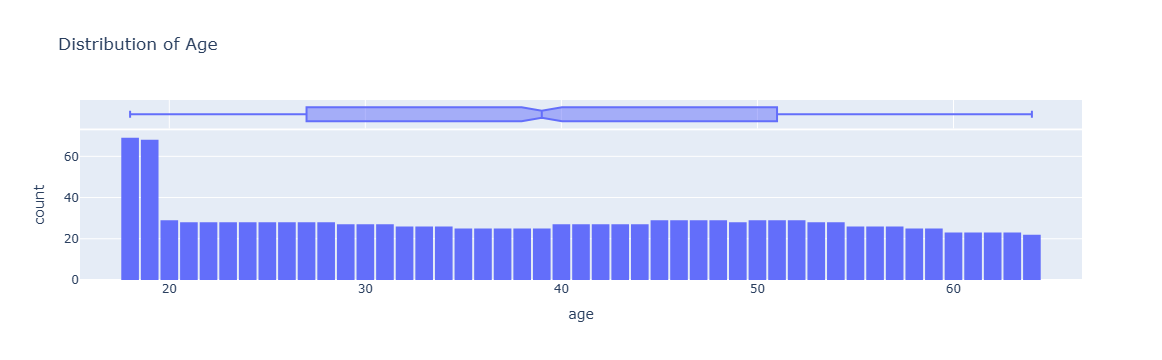

In [39]:
fig = px.histogram(medical_df,
                   x="age",
                   marginal="box",
                   nbins = 47,
                   title="Distribution of Age")
fig.update_layout(bargap=0.1)
fig.show()

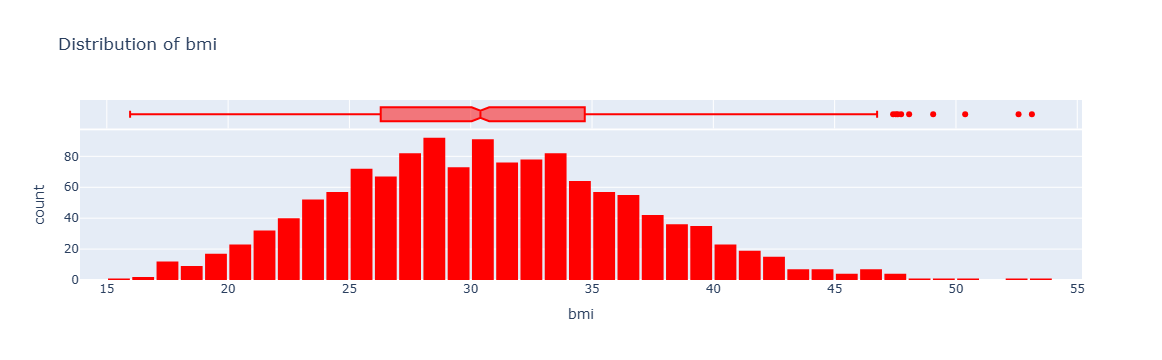

In [9]:
fig = px.histogram(medical_df,
                   x="bmi",
                   marginal="box",
                   color_discrete_sequence=["red"],
                   title="Distribution of bmi")
fig.update_layout(bargap=0.1)
fig.show()

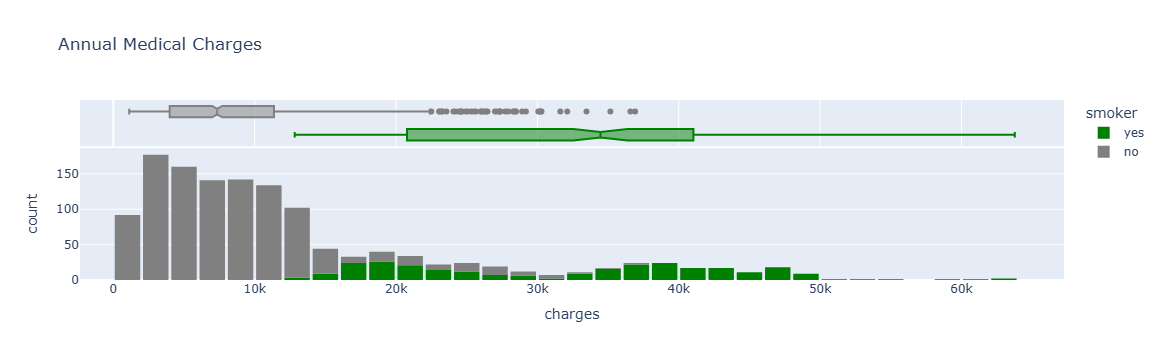

In [10]:
fig = px.histogram(medical_df,
                   x="charges",
                   marginal="box",
                   color = "smoker",
                   color_discrete_sequence=["green","grey"],
                   title="Annual Medical Charges")
fig.update_layout(bargap=0.1)
fig.show()

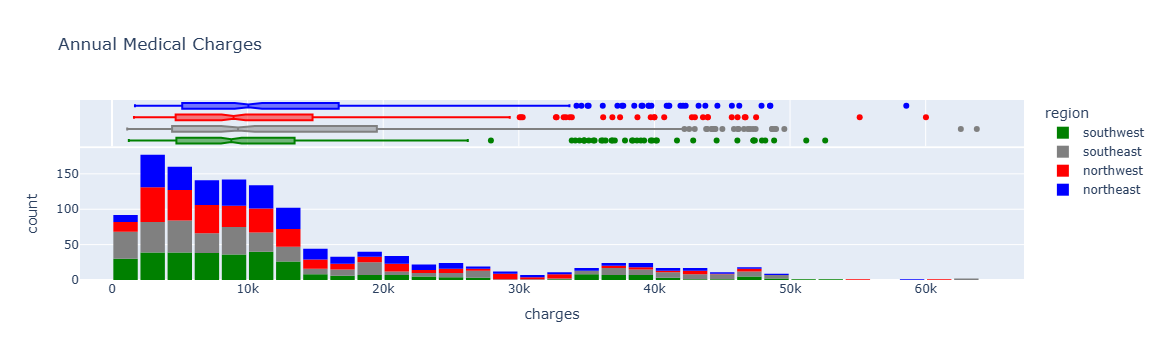

In [11]:
fig = px.histogram(medical_df,
                   x="charges",
                   marginal="box",
                   color = "region",
                   color_discrete_sequence=["green","grey","red","blue"],
                   title="Annual Medical Charges")
fig.update_layout(bargap=0.1)
fig.show()

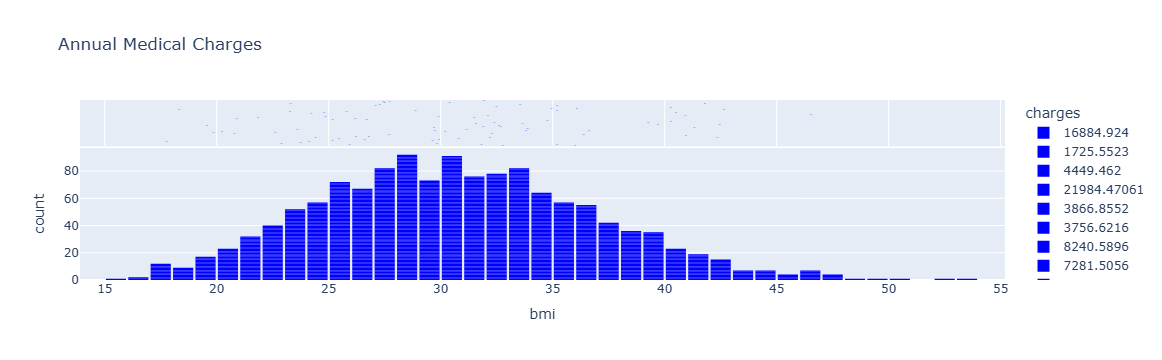

In [12]:
fig = px.histogram(medical_df,
                   x="bmi",
                   marginal="box",
                   color = "charges",
                   color_discrete_sequence=["blue"],
                   title="Annual Medical Charges")
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
medical_df.region.value_counts()


region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [14]:
medical_df.smoker.value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

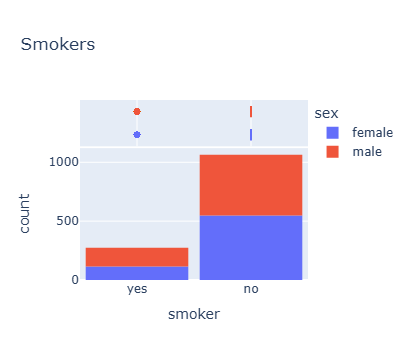

In [7]:
fig = px.histogram(medical_df,
                   x="smoker",
                   marginal="box",
                   color = "sex",
                  title="Smokers")
fig.update_layout(bargap=0.1)
fig.show()

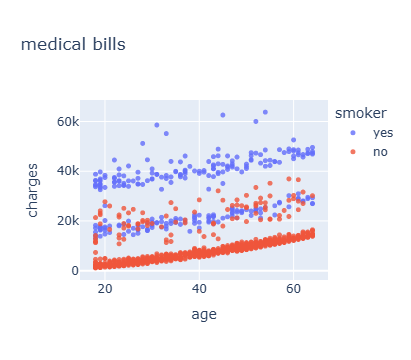

In [19]:
fig = px.scatter(medical_df,
                   x="age",
                   y="charges",
                   opacity=0.8,
                   color = "smoker",
                   hover_data=["sex"],
                  title="medical bills")
fig.update_traces(marker_size=5)
fig.show()

 ## Finding correlation coefficient between columns


In [20]:
medical_df.charges.corr(medical_df.age)

np.float64(0.2990081933306478)

In [23]:
medical_df.charges.corr(medical_df.bmi)

np.float64(0.19834096883362887)

In [27]:
smoker_values = {"no":0, "yes":1}
smoker_numeric =  medical_df.smoker.map(smoker_values)
medical_df.charges.corr(smoker_numeric)

np.float64(0.7872514304984778)

In [28]:
medical_df.charges.corr(medical_df.children)

np.float64(0.06799822684790487)

In [34]:
medical_df.corr(numeric_only=True)

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


### heatmap is better way to show correlations 


Text(0.5, 1.0, 'Correlation Matrix')

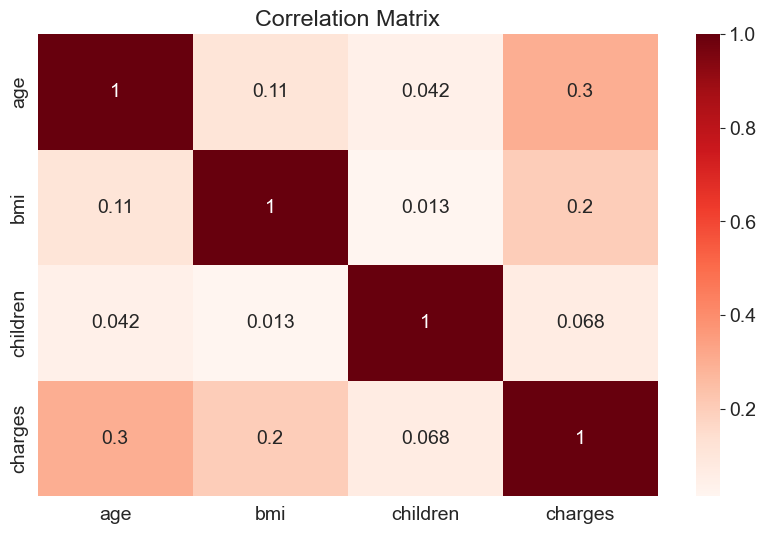

In [9]:
sns.heatmap(medical_df.corr(numeric_only=True),cmap="Reds",annot=True)
plt.title("Correlation Matrix")